In [1]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from google.colab import drive
from scipy.stats import ttest_ind, pearsonr, mannwhitneyu, shapiro
import statistics as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
from astropy.stats import knuth_bin_width

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv', index_col = 0)

Mounted at /content/drive


In [3]:
#print(df.columns)
#print(df.index)
print("Following method 1:")
print()
print("number of rows is", df.shape[0])
print("number of columns is", df.shape[1])
print(df.columns)

Following method 1:

number of rows is 442
number of columns is 11
Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'prog'],
      dtype='object')


In [4]:
print("number of columns is", df.shape[1])
print(df.columns)

print("data types of columns are \n", df.dtypes)

print()
print("first few rows are")
display(df.head())

print()
print("no columns contain any null values; thus there are no missing values.\n", df.isna().any())

print("the target is", df.columns[-1], "Its data type is", df.dtypes['prog'])

number of columns is 11
Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'prog'],
      dtype='object')
data types of columns are 
 age       int64
sex       int64
bmi     float64
map     float64
tc        int64
ldl     float64
hdl     float64
tch     float64
ltg     float64
glu       int64
prog      int64
dtype: object

first few rows are


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
1,59,1,32.1,101.0,157,93.2,38.0,4.0,2.110590,87,151
2,48,0,21.6,87.0,183,103.2,70.0,3.0,1.690196,69,75
3,72,1,30.5,93.0,156,93.6,41.0,4.0,2.029384,85,141
4,24,0,25.3,84.0,198,131.4,40.0,5.0,2.123852,89,206
5,50,0,23.0,101.0,192,125.4,52.0,4.0,1.863323,80,135



no columns contain any null values; thus there are no missing values.
 age     False
sex     False
bmi     False
map     False
tc      False
ldl     False
hdl     False
tch     False
ltg     False
glu     False
prog    False
dtype: bool
the target is prog Its data type is int64


In [5]:
descriptive_table = df.describe().T[['mean','std','min','max']]
descriptive_table['range'] = descriptive_table['max']-descriptive_table['min']
descriptive_table['median'] = df.median()
descriptive_table['IQR'] = df.quantile(0.75)-df.quantile(0.25)
descriptive_table['skew'] = df.skew()
descriptive_table['excess kurtosis'] = df.kurtosis()
display(descriptive_table)

,mean,std,min,max,range,median,IQR,skew,excess kurtosis
age,48.518100,13.109028,19.000000,79.000000,60.000000,50.000000,20.750000,-0.231382,-0.671224
sex,0.468326,0.499561,0.000000,1.000000,1.000000,0.000000,1.000000,0.127385,-1.992811
bmi,26.375792,4.418122,18.000000,42.200000,24.200000,25.700000,6.075000,0.598148,0.095094
map,94.647059,13.831204,62.000000,133.000000,71.000000,93.000000,21.000000,0.290664,-0.532780
tc,189.140271,34.608052,97.000000,301.000000,204.000000,186.000000,45.500000,0.378108,0.232948
ldl,115.439140,30.413081,41.600000,242.400000,200.800000,113.000000,38.450000,0.436592,0.601381
hdl,49.788462,12.934202,22.000000,99.000000,77.000000,48.000000,17.500000,0.799255,0.981507
tch,4.070249,1.290450,2.000000,9.090000,7.090000,4.000000,2.000000,0.735374,0.444402
ltg,2.015740,0.226872,1.414973,2.652246,1.237273,2.006461,0.312929,0.291774,-0.134366
glu,91.260181,11.496335,58.000000,124.000000,66.000000,91.000000,14.750000,0.207917,0.236917


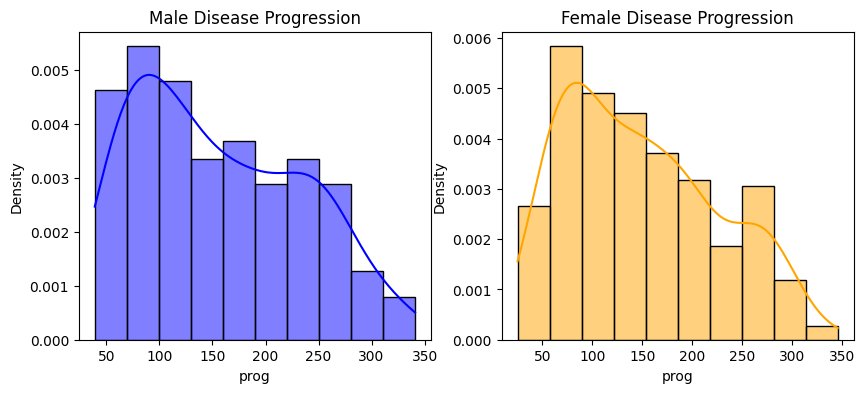

males: test statistic = 0.9472160505753628 p = 6.98349695157588e-07
females: test statistic = 0.9482366908843697 p = 2.0071299814161734e-07
U test statistic =  25375.0 p = 0.432427773770497


In [6]:
males = df[df['sex'] == 1]['prog'] #male
females = df[df['sex'] == 0]['prog'] #female

#print(males.shape)
#print(females.size)

'''plt.hist(males, bins = 15, label = 'Male', alpha = 0.5, color = 'blue') #maybe for this plot should use total number of data pts to determine bins???
plt.hist(females, bins = 15, label = 'Female', alpha = 0.5, color = 'orange')
plt.title('Disease Progression')
plt.legend()
plt.show()
'''

fig, ax = plt.subplots(1,2,figsize = (10,4))

width_males, bin_edges_males = knuth_bin_width(males, return_bins=True)
width_females, bin_edges_females = knuth_bin_width(females, return_bins=True)

bins = max(bin_edges_females.shape[0], bin_edges_males.shape[0]) #maximum gets more detailed one.

sns.histplot(males, bins = bins, kde = True, color = 'blue', ax = ax[0], stat = 'density')
sns.histplot(females, bins = bins, kde = True, color = 'orange', ax = ax[1], stat = 'density')


ax[0].set_title('Male Disease Progression')
ax[1].set_title('Female Disease Progression')
plt.show()

stat1, p1 = shapiro(males)
stat2, p2 = shapiro(females)
print("males: test statistic =", stat1, "p =", p1)
print("females: test statistic =", stat2, "p =", p2)

stat, p_value = mannwhitneyu(males, females, alternative = 'two-sided') #defaults to two-sided though
print("U test statistic = ", stat, "p =", p_value)

#use nonparametric models when data is not gaussian

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
map,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
tc,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
ldl,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
hdl,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
tch,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
ltg,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
glu,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


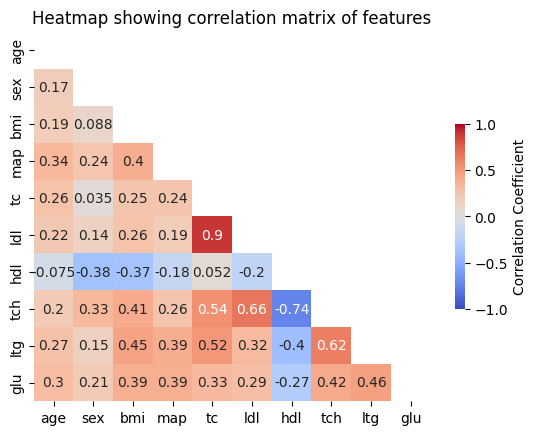

In [7]:
features = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
corr_matrix = df[features].corr()
display(corr_matrix)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#plt.imshow(corr_matrix, cmap='coolwarm', vmin = -1, vmax = 1) #this is the choice i made i guess; since correlation is between -1 and 1. same with cmap - made a choice with that
sns.heatmap(corr_matrix, cmap = 'coolwarm', mask = mask, vmin = -1, vmax = 1, annot = True, cbar_kws = {'shrink': .5, 'label': 'Correlation Coefficient'})
#plt.colorbar(label = 'Correlation Coefficient')
#plt.xticks(range(10), labels = features)
#plt.yticks(range(10), labels = features )
plt.title("Heatmap showing correlation matrix of features")
plt.show()

bmi    0.586450
ltg    0.565883
map    0.441484
tch    0.430453
glu    0.382483
tc     0.212022
age    0.187889
ldl    0.174054
sex    0.043062
hdl   -0.394789
dtype: float64


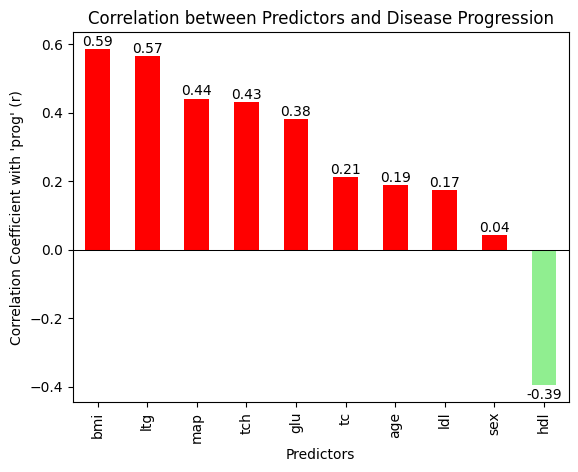

In [8]:
correlations = df[features].corrwith(df['prog'])
correlations_desc = correlations.sort_values(ascending = False)
print(correlations_desc)

colours = ['red' if corr > 0 else 'lightgreen' for corr in correlations_desc.values]

correlations_desc.plot(kind = 'bar', color = colours)
for i, v in enumerate(correlations_desc):
    plt.text(i, v + (0.01 if v > 0 else -0.04), f"{v:.2f}", ha='center', fontsize=10)
plt.axhline(0, color = 'black', linewidth = 0.75)
plt.title("Correlation between Predictors and Disease Progression")
plt.xlabel("Predictors")
plt.ylabel("Correlation Coefficient with 'prog' (r)")
plt.show()

In [9]:
df2 = df[['age', 'prog', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'sex']]
df2['sex'] = df2['sex'].astype(int)

df2.info(show_counts = False)
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1 to 442
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   age     int64  
 1   prog    int64  
 2   bmi     float64
 3   map     float64
 4   tc      int64  
 5   ldl     float64
 6   hdl     float64
 7   tch     float64
 8   ltg     float64
 9   glu     int64  
 10  sex     int64  
dtypes: float64(6), int64(5)
memory usage: 41.4 KB


,age,prog,bmi,map,tc,ldl,hdl,tch,ltg,glu,sex
1,59,151,32.1,101.0,157,93.2,38.0,4.0,2.110590,87,1
2,48,75,21.6,87.0,183,103.2,70.0,3.0,1.690196,69,0
3,72,141,30.5,93.0,156,93.6,41.0,4.0,2.029384,85,1
4,24,206,25.3,84.0,198,131.4,40.0,5.0,2.123852,89,0
5,50,135,23.0,101.0,192,125.4,52.0,4.0,1.863323,80,0


[[ 0.01852082 -0.00795769 -0.04507155  0.04606014 -0.03308694  0.0256012
  -0.02869419  0.47086647  1.01605203  0.01955008]]
[-4.04391631]


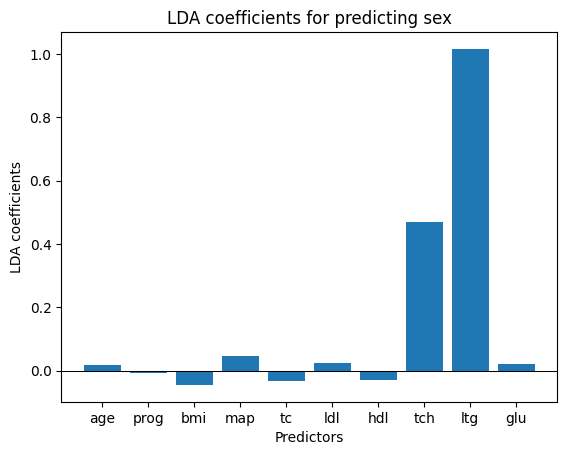

In [10]:
new_features = ['age', 'prog', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

sex_binary = df2["sex"].map({0: "Female", 1: "Male"})
labels = ["Female", "Male"]

lda_all = LDA().fit(df2[new_features], sex_binary)
print(lda_all.coef_)
print(lda_all.intercept_)



plt.bar(new_features, lda_all.coef_[0]) #coeff_age
plt.axhline(0, color = 'black', linewidth = 0.75)
plt.xlabel('Predictors')
plt.ylabel('LDA coefficients')
plt.title('LDA coefficients for predicting sex')
plt.show()

Training-set (descriptive) accuracy: 0.713


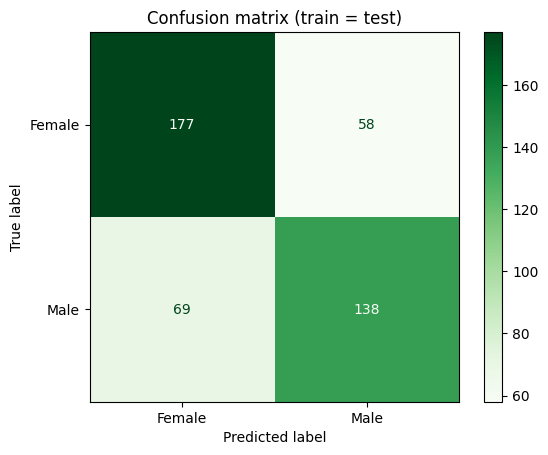

In [11]:
pred_all = lda_all.predict(df2[new_features])
print(f"Training-set (descriptive) accuracy: {accuracy_score(sex_binary, pred_all):.3f}")

ConfusionMatrixDisplay.from_predictions(sex_binary, pred_all, labels = labels, cmap = 'Greens')
plt.title("Confusion matrix (train = test)")
plt.show()

Test-set accuracy: 0.719


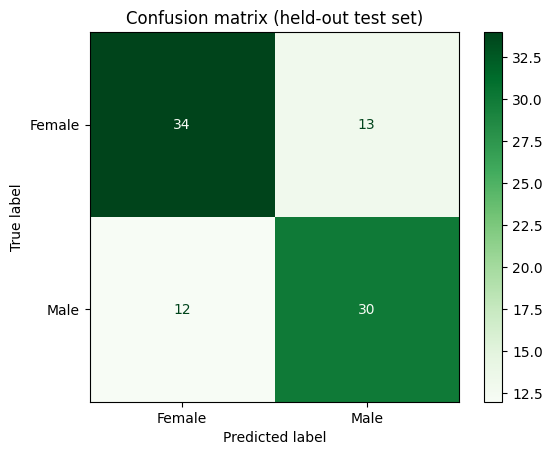

80/20 train/test split was used


In [12]:
X_tr, X_te, y_tr, y_te = train_test_split(df2[new_features], sex_binary, test_size=0.2, random_state=41, stratify=sex_binary) # stratify preserves the class proportions of y in testing and training.
lda_split = LDA().fit(X_tr, y_tr)
pred_te = lda_split.predict(X_te)
print(f"Test-set accuracy: {accuracy_score(y_te, pred_te):.3f}")
ConfusionMatrixDisplay.from_predictions(y_te, pred_te, labels=labels, cmap = 'Greens')
plt.title("Confusion matrix (held-out test set)")
plt.show()

print("80/20 train/test split was used")

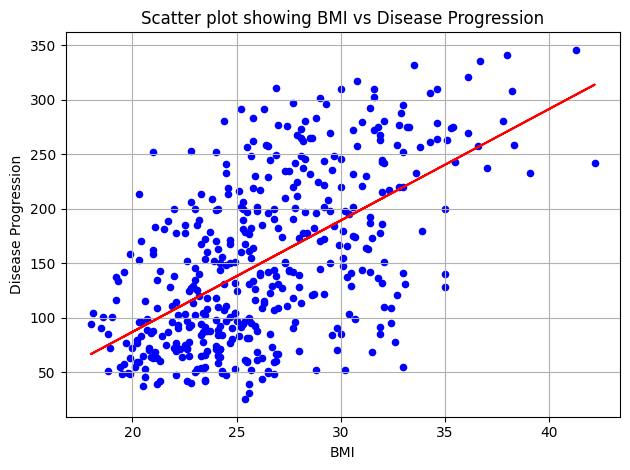

r and p: 0.5864501344746887 3.4660064451669974e-42


In [13]:
m, c = np.polyfit(df2['bmi'], df2['prog'], deg = 1)

plt.figure()
plt.scatter(df2['bmi'], df2['prog'], color='blue', s=20)
plt.plot(df2['bmi'], m*df2['bmi']+c, color='red')
plt.title("Scatter plot showing BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid(True)
plt.tight_layout()
plt.show()

r_value, p_value_2 = pearsonr(df2['bmi'], df2['prog'])
print("r and p:", r_value, p_value_2)